# Exploratory Data Analysis

This notebook explores daily household energy consumption patterns and prepares the data for time series modeling. The goal is to understand seasonality, variability, and structural characteristics that inform model choice.

## 1. Problem Statement

The objective of this project is to forecast daily household energy consumption using historical usage data. Accurate short-term forecasts can support demand planning, anomaly detection, and energy efficiency analysis.

This notebook focuses on understanding the data and identifying temporal patterns relevant to forecasting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import import_ipynb
from statsmodels.graphics.tsaplots import plot_acf
from aggregate_data import aggregate_daily_data

# Loading in data
data = pd.read_csv("household_power_consumption.txt", sep=";", na_values="?", low_memory=False)
print(data.head())

         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


## 2. Dataset Description

The dataset contains minute-level measurements of electricity consumption, including active power, voltage, and sub-metered usage. For this analysis, the data is aggregated to daily totals of active energy consumption.

Key preprocessing steps include:
- Parsing timestamps and setting a datetime index
- Handling missing or malformed values
- Aggregating minute-level data into daily totals
- Correcting units from watts to kilowatt-hours

In [2]:
#Aggregate to daily totals
daily_data = aggregate_daily_data(data)
print(daily_data.head())

            Global_active_power  Global_reactive_power    Voltage  \
Datetime                                                            
2006-12-16             1209.176                 34.922   93552.53   
2006-12-17             3390.460                226.006  345725.32   
2006-12-18             2203.826                161.792  347373.64   
2006-12-19             1666.194                150.942  348479.01   
2006-12-20             2225.748                160.998  348923.61   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
Datetime                                                                       
2006-12-16            5180.8             0.0           546.0          4926.0   
2006-12-17           14398.6          2033.0          4187.0         13341.0   
2006-12-18            9247.2          1063.0          2621.0         14018.0   
2006-12-19            7094.0           839.0          7602.0          6197.0   
2006-12-20            9313.0        

## 3. Daily Energy Consumption Over Time

The following plot shows daily total energy consumption over the full observation period. Visual inspection helps identify trends, seasonality, and potential anomalies.

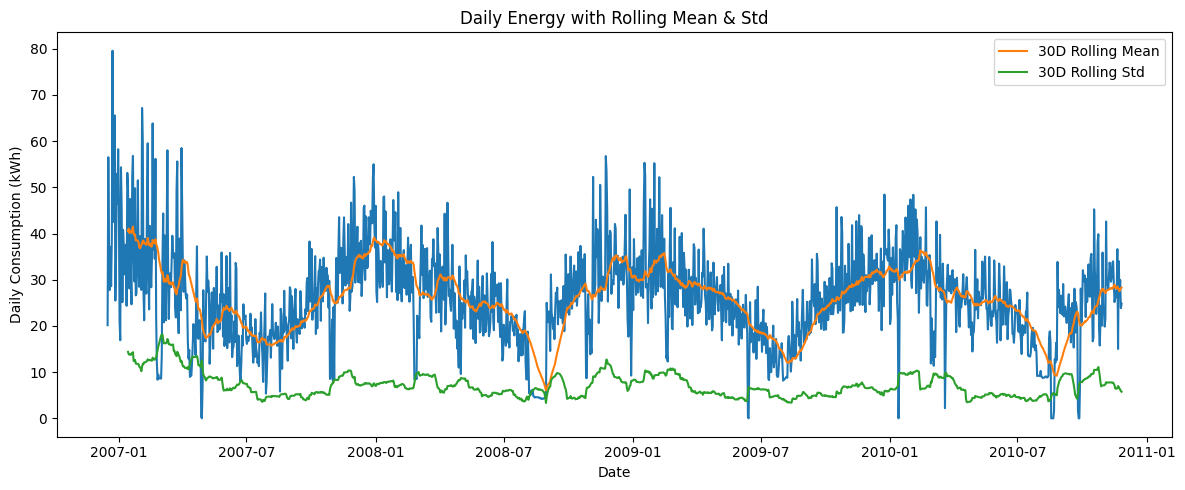

In [3]:
# Power consumption vs time
fig, ax = plt.subplots(figsize=(12,5))
y = daily_data['Global_active_power_kWh'].dropna()
x = daily_data.index
ax.plot(x, y)
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(ax.xaxis.get_major_locator()))
ax.set_xlabel("Date")
ax.set_ylabel("Daily Consumption (kWh)")
ax.set_title("Household Energy Consumption Over Time")

# Rolling Mean
ax.plot(x, y.rolling(30).mean(), label="30D Rolling Mean")
ax.plot(x, y.rolling(30).std(), label="30D Rolling Std")

ax.set_xlabel("Date")
ax.set_ylabel("Daily Consumption (kWh)")
ax.set_title("Daily Energy with Rolling Mean & Std")
ax.legend()

plt.tight_layout()
plt.show()

## 3. Autocorrelation Structure

Autocorrelation (ACF) plots are used to identify temporal dependence and recurring cycles in daily energy consumption. These patterns inform lag selection for forecasting models.

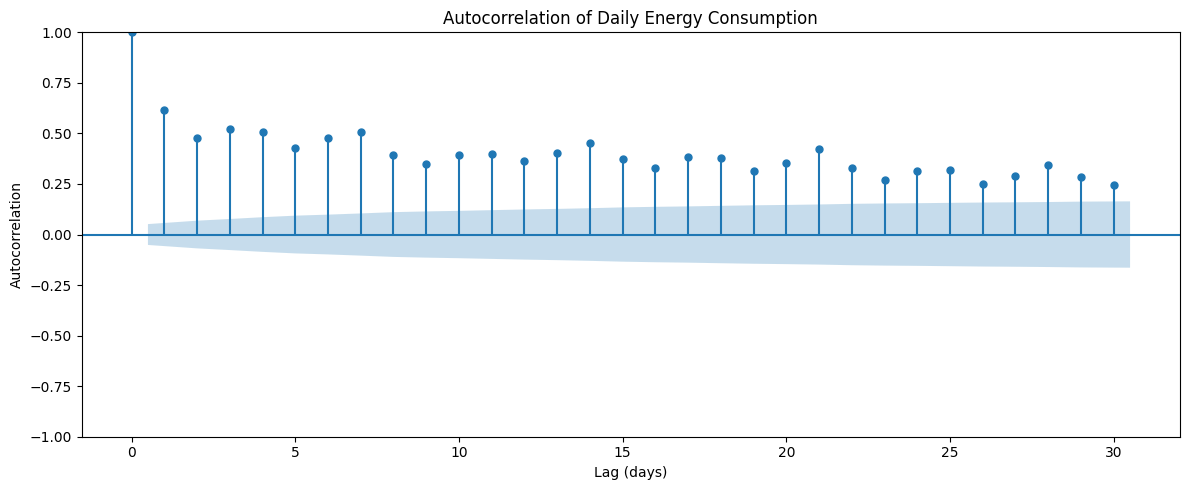

In [4]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(y, lags=30, ax=ax)
ax.set_title("Autocorrelation of Daily Energy Consumption")
ax.set_xlabel("Lag (days)")
ax.set_ylabel("Autocorrelation")

plt.tight_layout()
plt.show()

## 4. Distribution of Daily Consumption

Understanding the distribution of daily energy usage provides insight into typical consumption levels, skewness, and the presence of extreme values that may affect modeling assumptions.

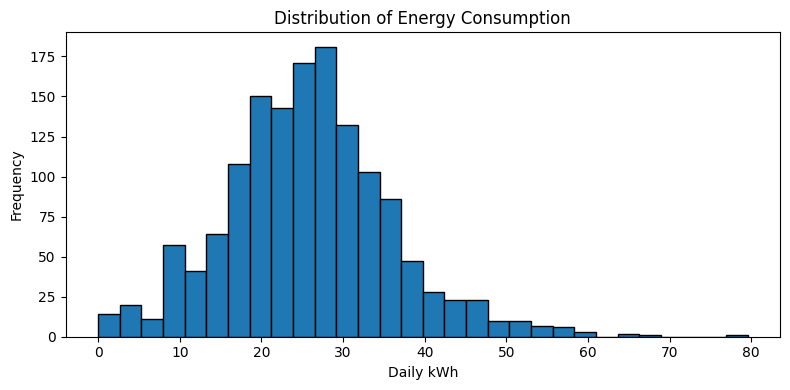

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(y, bins=30, edgecolor="black")
ax.set_title("Distribution of Energy Consumption")
ax.set_xlabel("Daily kWh")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## 5. Weekly Patterns

This section compares consumption across days of the week to assess whether systematic behavioral patterns exist.

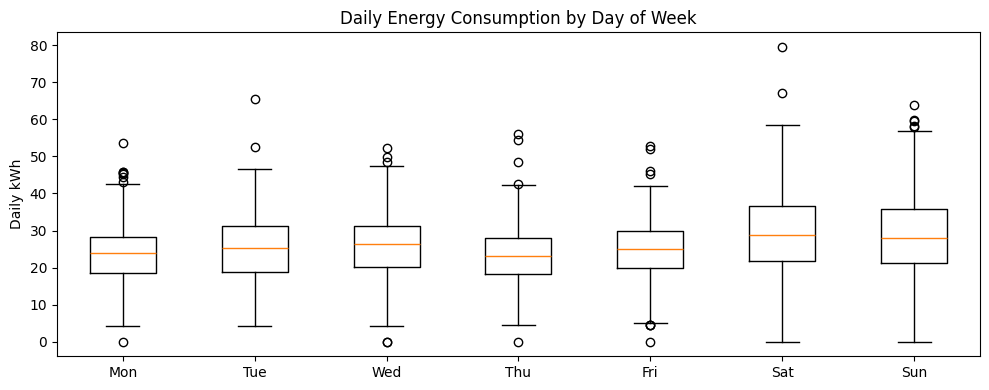

In [6]:
fig, ax = plt.subplots(figsize=(10,4))
day_of_week = x.dayofweek
ax.boxplot([y[day_of_week==i] for i in range(7)], tick_labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
ax.set_title("Daily Energy Consumption by Day of Week")
ax.set_ylabel("Daily kWh")

plt.tight_layout()
plt.show()

## 6. Key Findings

- Daily energy consumption exhibits strong weekly seasonality
- Weekend consumption shows higher variance than weekdays
- The distribution of daily totals is slightly right-skewed
- Autocorrelation suggests dependence at short lags and weekly intervals

These observations guide model selection in the next phase.